In [113]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [114]:
df = pd.read_csv('/Users/joaopereira/Documents/Ir0nH@ck/Mid Camp Project/books.csv',error_bad_lines = False)

/var/folders/57/4_7_gvfx4rd62jd_bgj3100m0000gn/T/ipykernel_23114/3608041012.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/Users/joaopereira/Documents/Ir0nH@ck/Mid Camp Project/books.csv',error_bad_lines = False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [115]:
df.isnull().sum() #checking for any null values present in the data


bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [116]:
df.dtypes #checking the data types of each column


bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [117]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [118]:
df = df.drop(['bookID', 'isbn13', 'isbn', 'text_reviews_count', 'publisher'], axis=1)

In [119]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,9/16/2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,9/1/2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,11/1/2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,5/1/2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,9/13/2004


In [120]:
df = df.sort_values('ratings_count', ascending=False) #ordering the df by avarege rating

In [121]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date
10336,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,9/6/2006
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,8/15/2002
1462,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,1/30/2001
307,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,4/1/2006
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,5/1/2004


In [122]:
df = df.head(n=15) #limit to 15 first rows


In [123]:
df.to_csv('my_dataframe.csv', index=False) #checking if the output was really 100 rows

In [124]:
df = df.rename(columns={'  num_pages': 'num_pages'}) #fix the misspelled column name using the rename method

In [125]:
max_num_pages = df['num_pages'].max() # the row(s) with the greatest value in the num_pages column
print(max_num_pages)

870


In [126]:
std = df['num_pages'].std()
mean = df['num_pages'].mean()

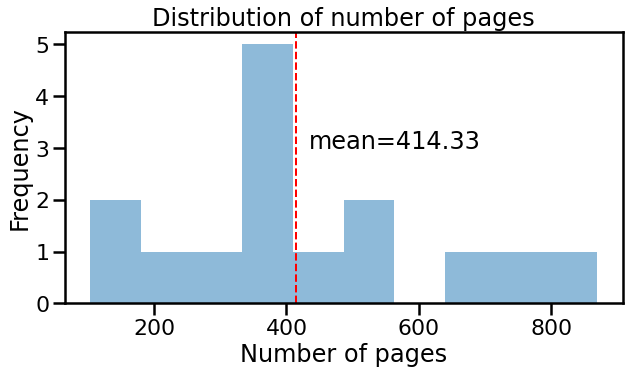

In [127]:
plt.figure(figsize=(10, 5))
plt.hist(df['num_pages'], bins=10, alpha=0.5)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.text(mean+20, 3, f'mean={mean:.2f}')
plt.xlabel('Number of pages')
plt.ylabel('Frequency')
plt.title('Distribution of number of pages')
plt.show()

In [128]:
big_filter = mean + std
big_filter

629.4747043520417

In [129]:
small_filter = mean - std
small_filter

199.19196231462496

In [130]:
bin_edges = [0, 180, 575, 1276]
bin_labels = ['Small', 'Medium', 'Large']

In [131]:
df['num_page_bins'] = pd.cut(df['num_pages'], bins=bin_edges, labels=bin_labels)

In [132]:
print(df['num_page_bins'])


10336    Medium
1697     Medium
1462     Medium
307       Large
3        Medium
4415     Medium
1         Large
23       Medium
2114      Small
0         Large
2116     Medium
5015     Medium
7309     Medium
294       Small
310      Medium
Name: num_page_bins, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']


In [133]:
df.reset_index(inplace=True,drop=True)

In [134]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,num_page_bins
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,9/6/2006,Medium
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,8/15/2002,Medium
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,1/30/2001,Medium
3,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,4/1/2006,Large
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,5/1/2004,Medium


In [135]:
df[['title']].to_csv('titles.csv', index=False)

In [136]:
genres_df = pd.read_csv("Genre.csv")

In [137]:
genres_df.head()

,genre
0,Fantasy
1,Fantasy
2,Classics
3,Thriller
4,Fantasy


In [138]:
df.merge(genres_df["genre"],left_index=True,right_index=True)
df = df.merge(genres_df["genre"],left_index=True,right_index=True)


In [139]:
df = df.rename(columns={"genre": "Genre"}) #I needed this to look better on tableau filter

In [140]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,num_page_bins,Genre
0,Twilight (Twilight #1),Stephenie Meyer,3.59,eng,501,4597666,9/6/2006,Medium,Fantasy
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,8/15/2002,Medium,Fantasy
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,1/30/2001,Medium,Classics
3,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,4/1/2006,Large,Thriller
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,5/1/2004,Medium,Fantasy


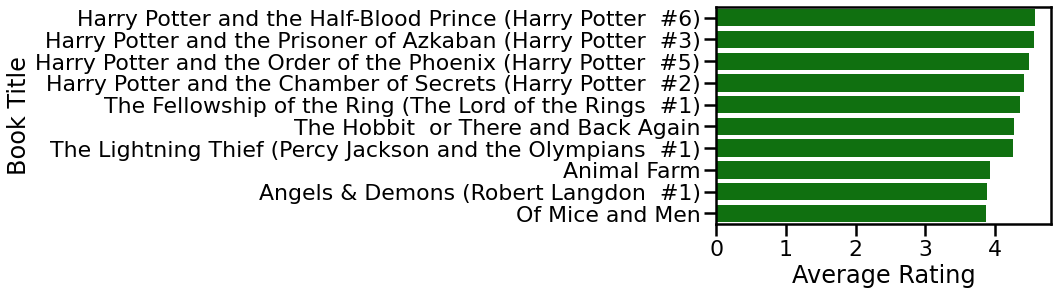

In [141]:
most_text = df.sort_values('average_rating', ascending=False).head(10).set_index('title')
sns.barplot(data=most_text, x='average_rating', y=most_text.index, color='g')
sns.set_context('poster')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show() #Which are the books with the highest reviews?


/Users/joaopereira/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


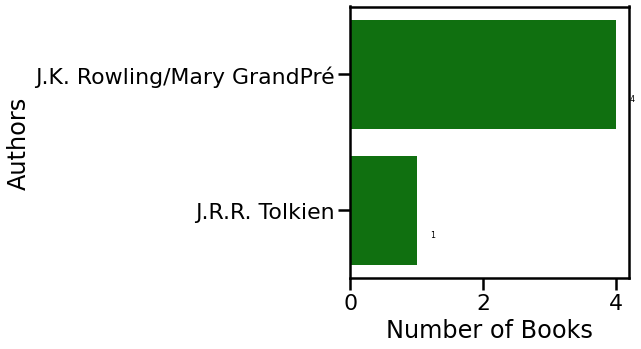

In [142]:
# Find authors with the highest-rated books
high_rated_author = df[df['average_rating']>=4.3]['authors'].value_counts().nlargest(10)
plt.figure(figsize=(5,5))
ax = sns.barplot(high_rated_author.values, high_rated_author.index, color='g')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i, (count, author) in enumerate(zip(high_rated_author.values, high_rated_author.index)):
    ax.text(count+0.2, i+0.2, str(count), fontsize=8, color='k')

/Users/joaopereira/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


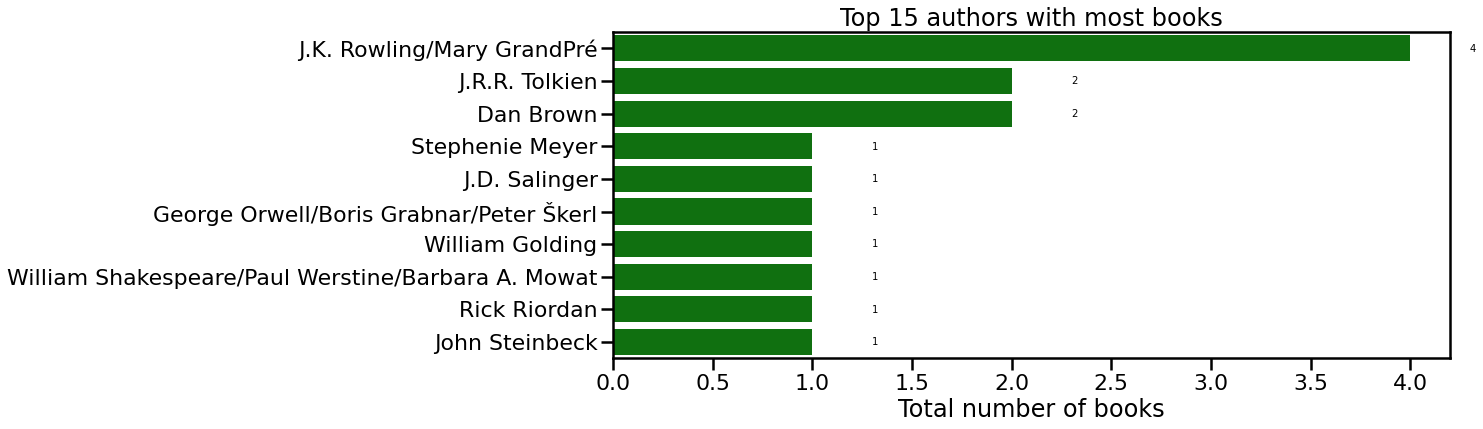

In [143]:
# Which are the authors with most books?
most_books = df['authors'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
ax = sns.barplot(most_books.values, most_books.index, color='g')
ax.set_title("Top 15 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

In [144]:
trial = df[~(df.ratings_count>2000000)]

<Figure size 1080x720 with 0 Axes>

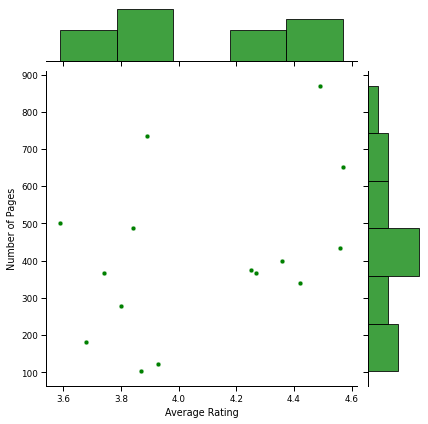

In [145]:
plt.figure(figsize=(15,10)) #Is there a relationship between number of pages and ratings?
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'g')
ax.set_axis_labels("Average Rating", "Number of Pages")

In [146]:
new_row = df.replace("J.K. Rowling/Mary GrandPré", "J.K. Rowling") #I had to change the name to make an 'action' work on tableau. Mary was just the illustrator of the books. 
df = new_row = df.replace("J.K. Rowling/Mary GrandPré", "J.K. Rowling")

In [147]:
new_row_book_name = df.replace("William Shakespeare/Paul Werstine/Barbara A. Mowat", "William Shakespeare") #needed this to fit in the graph
df = new_row_book_name = df.replace("William Shakespeare/Paul Werstine/Barbara A. Mowat", "William Shakespeare")

In [148]:
new_row_author_name = df.replace("George Orwell/Boris Grabnar/Peter Škerl", "George Orwell") #had to do in separated
df = new_row_author_name = df.replace("George Orwell/Boris Grabnar/Peter Škerl", "George Orwell")

In [149]:
title = df.loc[0].title #changed from 'Twilight (Twilight #1)' to 'Twilight'
df = df.replace(title, "Twilight")
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,publication_date,num_page_bins,Genre
0,Twilight,Stephenie Meyer,3.59,eng,501,4597666,9/6/2006,Medium,Fantasy
1,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,eng,366,2530894,8/15/2002,Medium,Fantasy
2,The Catcher in the Rye,J.D. Salinger,3.80,eng,277,2457092,1/30/2001,Medium,Classics
3,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,eng,736,2418736,4/1/2006,Large,Thriller
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,eng,435,2339585,5/1/2004,Medium,Fantasy


In [150]:
print(df) #just checking. All good :D

                                                title              authors  \
0                                            Twilight      Stephenie Meyer   
1                 The Hobbit  or There and Back Again       J.R.R. Tolkien   
2                              The Catcher in the Rye        J.D. Salinger   
3                Angels & Demons (Robert Langdon  #1)            Dan Brown   
4   Harry Potter and the Prisoner of Azkaban (Harr...         J.K. Rowling   
5   Harry Potter and the Chamber of Secrets (Harry...         J.K. Rowling   
6   Harry Potter and the Order of the Phoenix (Har...         J.K. Rowling   
7   The Fellowship of the Ring (The Lord of the Ri...       J.R.R. Tolkien   
8                                         Animal Farm        George Orwell   
9   Harry Potter and the Half-Blood Prince (Harry ...         J.K. Rowling   
10                                  Lord of the Flies      William Golding   
11                                   Romeo and Juliet  William S

In [151]:
df.to_csv('final.df.csv', index=False)